# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords

In [3]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 50
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews
Scraping page 21
   ---> 2100 total reviews
Scraping page 22
   ---> 2200 total reviews
Scraping page 23
   ---> 2300 total reviews
Scrapi

In [4]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,Not Verified | Regarding the aircraft and seat...
1,Not Verified | I travelled with British Airway...
2,Not Verified | Food was lousy. Who ever is pl...
3,✅ Trip Verified | Had the worst experience. Th...
4,✅ Trip Verified | The ground staff were not h...


In [5]:
df.to_csv("data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [6]:
# Loading the dataset now
df = pd.read_csv('data/BA_reviews.csv')

In [7]:
df.head()

,Unnamed: 0,reviews
0,0,Not Verified | Regarding the aircraft and seat...
1,1,Not Verified | I travelled with British Airway...
2,2,Not Verified | Food was lousy. Who ever is pl...
3,3,✅ Trip Verified | Had the worst experience. Th...
4,4,✅ Trip Verified | The ground staff were not h...


###  cleaning the data

In [8]:

nltk.download('stopwords')
stopwords = set(stopwords.words('english'))

def clean_text(text):
    # Remove HTML tags
    text = re.sub(r'<[^>]+>', '', text)

    # Remove non-text characters
    text = re.sub(r'[^a-zA-Z]', ' ', text)

    # Convert all text to lowercase
    text = text.lower()

    # Remove stopwords
    text = ' '.join([word for word in text.split() if word not in stopwords])

    return text

clean_reviews = [clean_text(review) for review in reviews]


[nltk_data] Downloading package stopwords to /home/pius/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
# Add the cleaned reviews to a new column in the dataframe
df['cleaned_reviews'] = clean_reviews

In [10]:
# Save the dataframe to the same CSV file, overwriting the old data
df.to_csv("data/BA_reviews.csv")

In [11]:
df.head()

,Unnamed: 0,reviews,cleaned_reviews
0,0,Not Verified | Regarding the aircraft and seat...,verified regarding aircraft seat business clas...
1,1,Not Verified | I travelled with British Airway...,verified travelled british airways sweden los ...
2,2,Not Verified | Food was lousy. Who ever is pl...,verified food lousy ever planning asian hindu ...
3,3,✅ Trip Verified | Had the worst experience. Th...,trip verified worst experience flight london t...
4,4,✅ Trip Verified | The ground staff were not h...,trip verified ground staff helpful felt like w...


## data analysis

In [12]:
# First we apply sentiment analysis using TextBlob to calculate the polarity of each review.

from textblob import TextBlob

sentiment_scores = []

for review in clean_reviews:
    blob = TextBlob(review)
    sentiment_scores.append(blob.sentiment.polarity)
    
df['sentiment_score'] = sentiment_scores


In [13]:
df.head()

,Unnamed: 0,reviews,cleaned_reviews,sentiment_score
0,0,Not Verified | Regarding the aircraft and seat...,verified regarding aircraft seat business clas...,-0.016892
1,1,Not Verified | I travelled with British Airway...,verified travelled british airways sweden los ...,-0.064912
2,2,Not Verified | Food was lousy. Who ever is pl...,verified food lousy ever planning asian hindu ...,0.006250
3,3,✅ Trip Verified | Had the worst experience. Th...,trip verified worst experience flight london t...,-0.160000
4,4,✅ Trip Verified | The ground staff were not h...,trip verified ground staff helpful felt like w...,0.133333


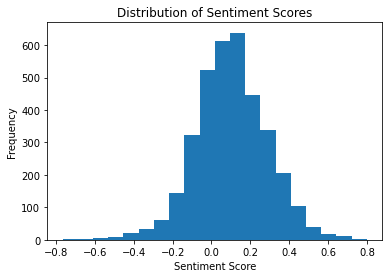

In [14]:
# Plot a histogram of sentiment scores
plt.hist(df['sentiment_score'], bins=20)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

### Topic modeling

In [15]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora

# Prepare data for topic modeling
reviews_tokens = [simple_preprocess(review) for review in clean_reviews]

# Remove stop words
reviews_tokens_no_stop = [[word for word in doc if word not in STOPWORDS] for doc in reviews_tokens]

# Create dictionary and corpus
dictionary = corpora.Dictionary(reviews_tokens_no_stop)
corpus = [dictionary.doc2bow(review) for review in reviews_tokens_no_stop]

# Train LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=10)

# Print topics and their top 10 keywords
for i, topic in lda_model.show_topics(num_topics=5, num_words=10, formatted=False):
    print(f"Topic {i+1}: {' '.join([word[0] for word in topic])}")


ValueError: numpy.ndarray size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

1.21.5
